# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

/Users/glddm/miniconda3/envs/py311/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/glddm/miniconda3/envs/py311/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/glddm/miniconda3/envs/py311/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <EDCC189C-6D3F-3948-87DF-FA6A06787893> /Users/glddm/miniconda3/envs/py311/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Here we can see one of the images.

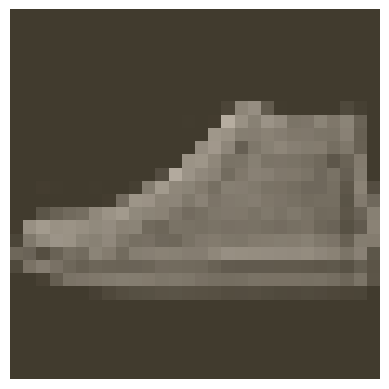

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
# Define your network architecture here
from torch import nn
import torch.nn.functional as F

class FashionNetwork(nn.Module):
    def __init__(self, hidden, classes = 10):
        super().__init__()
        
        self.fc1 = nn.Linear(28*28, hidden[0])
        self.fc2 = nn.Linear(hidden[0], hidden[1])
        self.fc3 = nn.Linear(hidden[1], classes)
        self.fc4 = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [5]:
# determining device (depending on GPU availability)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [45]:
# Create the network, define the criterion and optimizer
from torch import optim

# create the network
hidden_params = (100,256)
model = FashionNetwork(hidden_params)


# define the criterion
criterion = nn.NLLLoss()

# define the optimizer
optimizer = optim.Adam(model.parameters() , lr = 0.005)

In [59]:
# Train the network here
model.to(device)
model.train()
epochs = 20

for e in range(epochs):
    
    running_loss = 0.0
    
    for images, labels in trainloader: # at every batch

        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)
        
        # set gradients to zero
        optimizer.zero_grad()
        
        # compute output
        output = model(images)
        
        # compute the loss
        loss = criterion(output, labels)

        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    print(running_loss)
    print(f'Completed Epoch {e}')

228.85117533430457
Completed Epoch 0
227.72034537792206
Completed Epoch 1
235.94125001877546
Completed Epoch 2
228.86119316890836
Completed Epoch 3
238.29640055075288
Completed Epoch 4
227.71017809212208
Completed Epoch 5
225.14995213225484
Completed Epoch 6
224.38302774727345
Completed Epoch 7
225.36812137439847
Completed Epoch 8
230.0379545390606
Completed Epoch 9
217.52176508307457
Completed Epoch 10
233.92819749191403
Completed Epoch 11
220.42604115977883
Completed Epoch 12
227.25804856047034
Completed Epoch 13
221.52237257361412
Completed Epoch 14
219.4734763763845
Completed Epoch 15
237.02977530658245
Completed Epoch 16
218.58938762173057
Completed Epoch 17
218.28749025985599
Completed Epoch 18
220.99039369821548
Completed Epoch 19


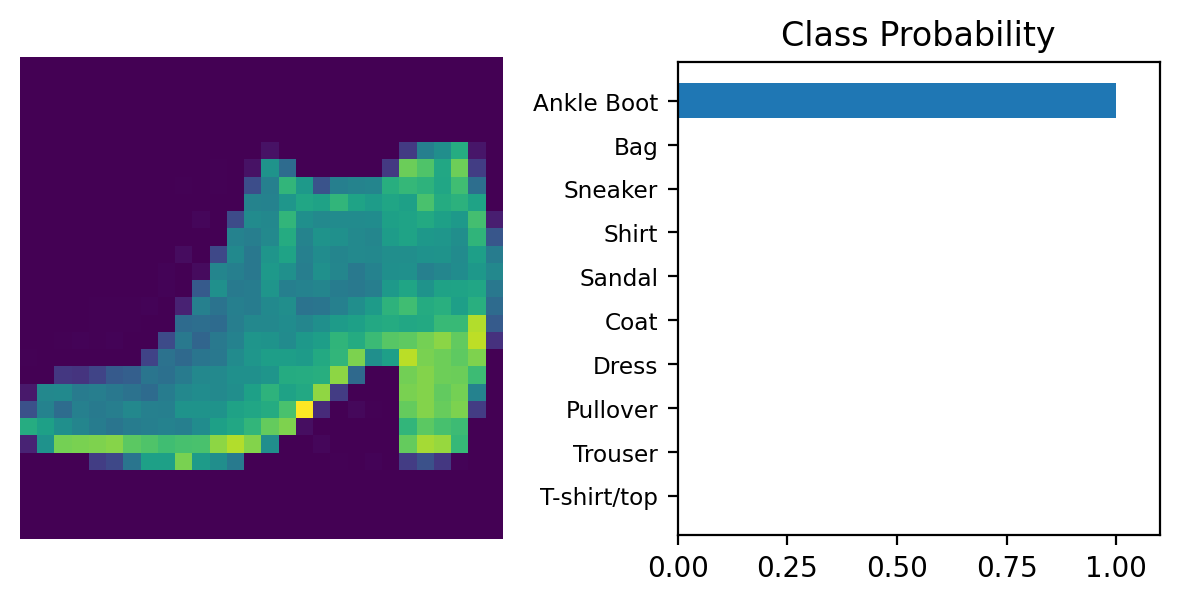

In [69]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

import helper
model.eval()
model.to('cpu')
# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
# images, labels = images.to(device), labels.to(device)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    ps = model(img)

# probs = np.exp(ps.numpy())

# # Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), torch.exp(ps), version='Fashion')